<a href="https://colab.research.google.com/github/bdfd/Section6.Project04_Customer_Segmentation/blob/main/Shopping_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cusomter Segmentation and Clustering

## Basic Approach

The Approach
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use KMEANS Clustering Algorithm to create our segments 
3. Use Summary Statistics on the clusters
4. Visualize

Target Cluster
*   Target group would be cluster 1 which has a high Spending Score and high income
*   60 percent of cluster 1 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster
*   Cluster 2 presents an interesting opportunity to market to the customers for sales event on popular items



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
path1 = 'https://raw.githubusercontent.com/bdfd/Section6.Project04_Customer_Segmentation/main/dataset/Mall_Customers.csv'
# upload dataset into data frame
df = pd.read_csv(path1)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


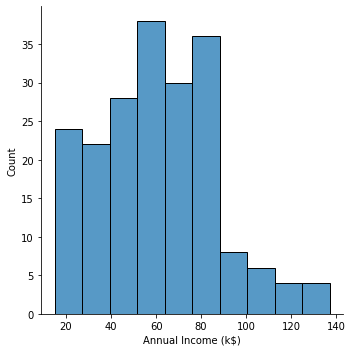

In [4]:
sns.displot(df['Annual Income (k$)'])

In [5]:
dis_columns = df.columns.tolist()
dis_columns.remove('CustomerID')
dis_columns

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<Figure size 432x288 with 0 Axes>

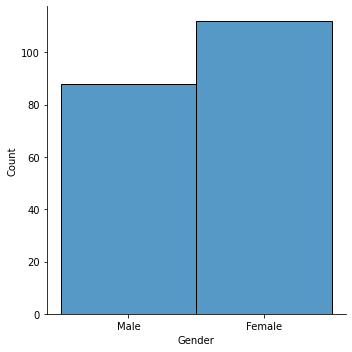

<Figure size 432x288 with 0 Axes>

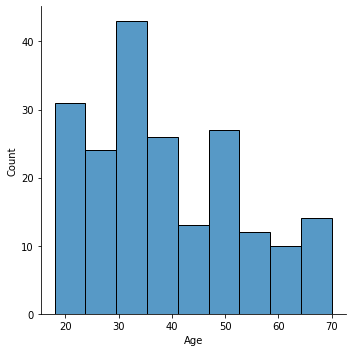

<Figure size 432x288 with 0 Axes>

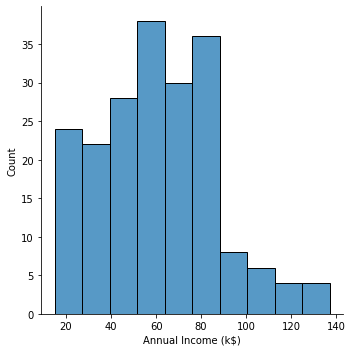

<Figure size 432x288 with 0 Axes>

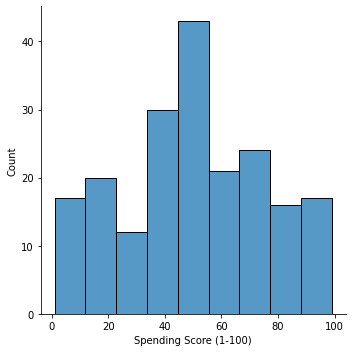

In [6]:
for i in dis_columns:
  plt.figure()
  sns.displot(df[i])

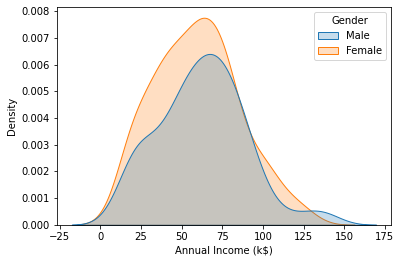

In [7]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender'])

In [8]:
kedp_columns = df.columns.tolist()
kedp_columns.remove('Gender')
kedp_columns.remove('CustomerID')
kedp_columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

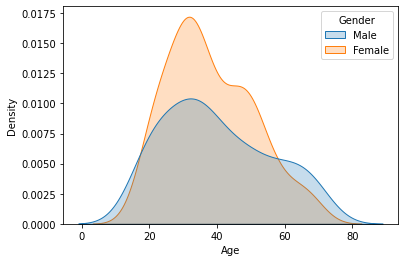

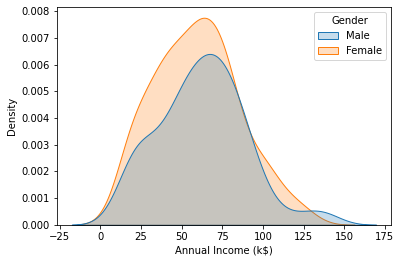

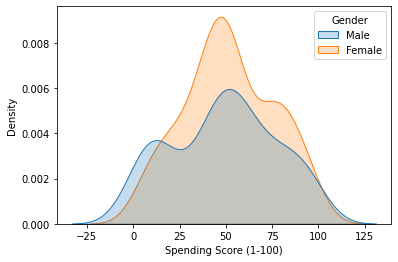

In [9]:
for i in kedp_columns:
  # print(i)
  plt.figure()
  sns.kdeplot(df[i],shade=True,hue=df['Gender'])

In [10]:
box_columns = df.columns.tolist()
box_columns.remove('Gender')
box_columns.remove('CustomerID')
box_columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

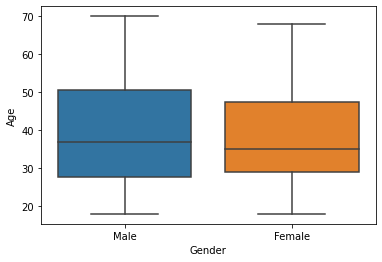

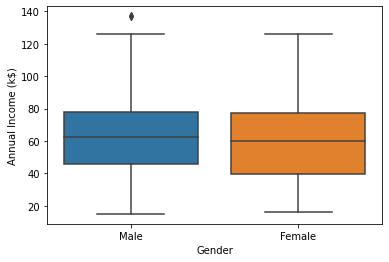

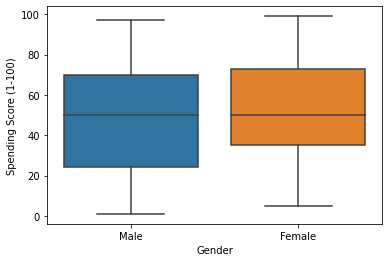

In [11]:
for i in box_columns:
  plt.figure()
  sns.boxplot(data=df,x='Gender',y=df[i])

In [12]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

##Binary Analysis

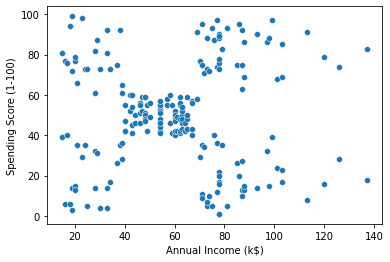

In [13]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

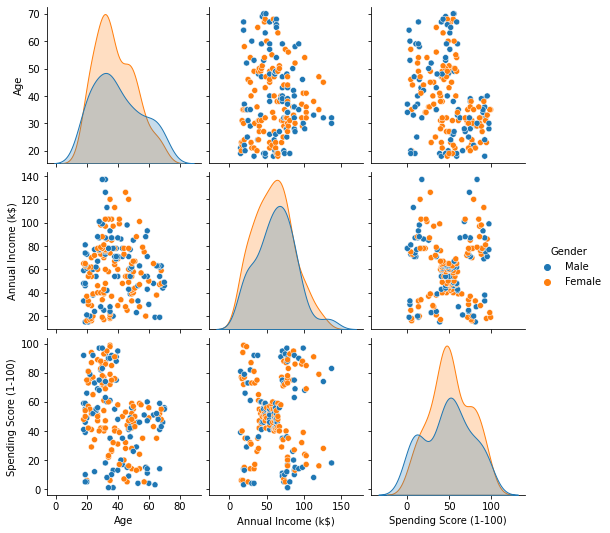

In [14]:
df2=df.drop('CustomerID',axis=1)
sns.pairplot(df2,hue='Gender')

In [15]:
df2.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df2.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


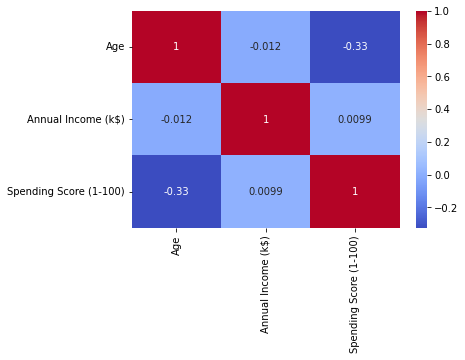

In [17]:
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

##Clustering - Univariate, Bivariate, Multivariate

In [18]:
df3 = df.copy()

In [19]:
clustering1 = KMeans(n_clusters = 3)

In [20]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [22]:
df3['Income Cluster'] = clustering1.labels_
df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [23]:
df3['Income Cluster'].value_counts()

0    104
1     74
2     22
Name: Income Cluster, dtype: int64

In [24]:
clustering1.inertia_

24361.259213759207

In [25]:
inertia_scores=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8534.415154553051,
 5050.9047619047615,
 3931.9880952380945,
 2822.4996947496966,
 2168.4787157287165,
 1783.8106060606071]

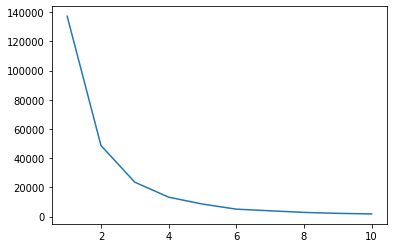

In [26]:
plt.plot(range(1,11),inertia_scores)

In [27]:
df3.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [28]:
df3.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.663462,69.750000,49.798077
1,39.500000,33.486486,50.229730
2,37.545455,108.181818,52.000000


#Bivariate Clustering

In [29]:
df3.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [30]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df3['Spending & Income Cluster'] = clustering2.labels_
df3.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,1


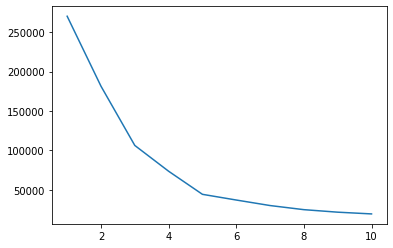

In [31]:
inertia_scores2=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores2.append(kmeans.inertia_)
inertia_scores2
plt.plot(range(1,11),inertia_scores2)

In [32]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,26.304348,20.913043
2,86.538462,82.128205
3,25.727273,79.363636
4,88.200000,17.114286


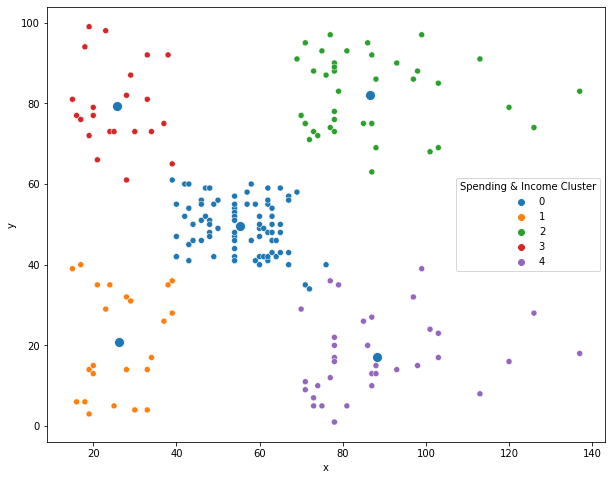

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=centers, x='x', y='y', s=100)
sns.scatterplot(data=df3, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending & Income Cluster',palette='tab10')

In [37]:
pd.crosstab(df3['Spending & Income Cluster'],df3['Gender'])

Gender,Female,Male
Spending & Income Cluster,,
0,48,33
1,14,9
2,21,18
3,13,9
4,16,19
